# Essential Questions to Answer
1. What rental features (amenities, house rules) lead to higher customer ratings and fetch higher rental income?
2. What are the features of high-demand properties? (75th, 80th percentile -> )
3. Are higher-income properties close to big cities, beaches, or tourist attractions? 
4. Which countries have the top Airbnb ratings and reviews?


In [20]:
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [13]:
# restart notebook to use aribnb_clean_2.csv
df = pd.read_csv('airbnb_clean_2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df_wo_new = df.loc[df['rating'] != -1]

What are the features of high-demand properties?
* assumption: High in demand means there are many reviews and there were many people who stayed at the airbnb compared to others

In [26]:
# Define high-demand properties (any listings with reviews in the 80th percentile)
high_demand_threshold = df_wo_new['reviews'].quantile(0.75)
high_rating_threshold = df_wo_new['rating'].quantile(0.75)
high_demand_properties = df_wo_new[(df_wo_new['reviews'] >= high_demand_threshold) & (df_wo_new['rating'] >= high_rating_threshold)]
high_demand_properties

,id,name,rating,reviews,host_id,address,price,country,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout,usd_price,tv,wifi,chromecast,refrigerator,kitchen,view,parking,workspace,pool,gym,no_pets,no_smoking,no_parties_or_events,house_rules_num,img_links_num,amenities_num
144,49527209,Livada-The tiny A-frame House/wi-fi/cadă baie/duș,4.99,97,380545308,"Peștenița, Hunedoara County, Romania",3062.00,Romania,0,2,3,1,1,0,3 00 pm - 12 00 am,12 00 pm,673.49,False,True,False,False,True,True,True,True,False,False,True,True,False,8,7,10
153,28573139,"❤THE NEST, 2BR Charming BeachFront home, HIN K...",4.98,91,89960116,"ตำบล เกาะพะงัน, ST, Thailand",11401.00,Thailand,1,3,5,0,2,0,3 00 pm - 9 00 pm,11 00 am,317.09,True,True,False,False,True,True,True,True,False,False,True,False,True,9,8,10
165,41611002,Villa overlooking the Balkan Mountains,5.00,120,191571720,"Troyan, Lovech, Bulgaria",7995.00,Bulgaria,1,3,6,0,2,0,After 3 00 pm,Flexible,4468.01,True,True,False,False,True,True,True,False,False,False,False,True,False,3,6,10
193,6512620,Villa Sunnyside Gartenhaus,4.99,124,25849825,"Dresden, Sachsen, Germany",5072.00,Germany,1,2,2,0,0,0,After 4 00 pm,11 00 am,5543.70,True,True,False,False,True,False,True,False,False,False,True,False,True,4,6,10
317,17010903,Beautiful cabin in Nusfjord,4.99,71,111886105,"Nusfjord, Nordland, Norway",12262.00,Norway,1,3,4,0,2,0,After 3 00 pm,12 00 pm,1140.82,True,True,False,False,True,False,True,False,False,False,True,True,True,8,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,5980767,Lovely mountain house - great view!,4.98,93,7368567,"Aich, Steiermark, Austria",16646.00,Austria,1,3,4,0,2,0,Flexible,12 00 pm,18194.08,True,True,False,False,True,True,True,True,False,False,False,True,True,9,8,11
12285,23464352,Romantic Rustic in the heart of the Dolomites,5.00,134,175091745,"Padola, Veneto, Italy",9513.00,Italy,1,2,3,0,1,0,4 00 pm - 9 00 pm,10 00 am,10397.71,True,True,False,False,True,False,True,True,False,False,True,True,True,8,6,10
12299,37008506,The Llama Lodge - a Log Cabin on a Llama Farm,4.99,91,195980040,"Llandissilio, United Kingdom",12890.00,United Kingdom,1,2,4,0,1,0,After 4 00 pm,12 00 pm,16737.48,False,True,False,True,True,True,True,False,False,False,True,True,True,5,7,10
12553,44532378,"Private glemping, forest lake, cozy, bbq",5.00,79,5673696,"Amata parish, Latvia",9603.00,Latvia,0,1,2,1,1,0,After 3 00 pm,12 00 pm,18843.80,False,False,False,False,True,True,True,False,False,False,True,True,True,7,6,10


In [34]:
features = ['tv', 'wifi', 'chromecast', 'refrigerator', 'kitchen', 'view', 
            'parking', 'workspace', 'pool', 'gym', 'no_pets', 'no_smoking', 
            'no_parties_or_events']

high_demand_features = high_demand_properties[features].mean()
overall_features = df_wo_new[features].mean()
high_demand_features

tv                     0.57
wifi                   0.76
chromecast             0.03
refrigerator           0.23
kitchen                0.90
view                   0.52
parking                0.92
workspace              0.29
pool                   0.10
gym                    0.00
no_pets                0.68
no_smoking             0.87
no_parties_or_events   0.84
dtype: float64

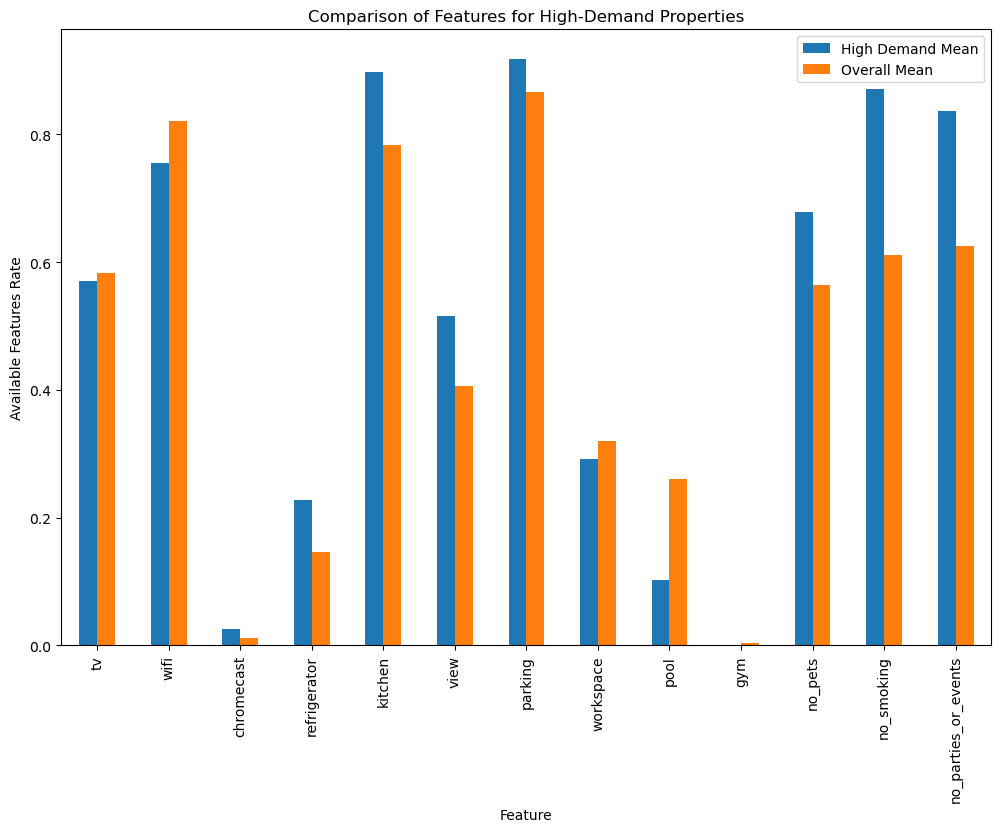

In [35]:
comparison_df = pd.DataFrame({
    'Feature': features,
    'High Demand Mean': high_demand_features,
    'Overall Mean': overall_features
})

comparison_df.plot(x='Feature', kind='bar', figsize=(12, 8))
plt.title('Comparison of Features for High-Demand Properties')
plt.ylabel('Available Features Rate')
plt.show()

Comparison of High Demand mean vs overall mean:
* Higher the number = higher the liklihood listings had features
* Most of the features are very similar from high demand vs overall mean
* Standout features:
  * chromecast is a rare find, but the airbnb high in demand had 2 times more liklihood of having chromecast than overall listings
  * fridge was found more in the more high in demand airbnb by nearly 25% than the overall
  * no pets, no smoking, and no parties or events were more desirable than the overall airbnb listing
  * wifi is expected and does not affect the rating of the aribnb
  * most airbnb have parking, kitchen, and wifi (which is not too surprising since the that is the expectation)
* This comparison really sugges that airbnb is more for convenience stay (like finding a second home when on vacation)




Which countries have the top Airbnb ratings and reviews?

In [37]:
country_summary = df_wo_new.groupby('country').agg({'rating': 'mean', 'reviews': 'sum'}).reset_index()
country_summary = country_summary.sort_values(by=['rating', 'reviews'], ascending=[False, False])

country_summary.head()

,country,rating,reviews
2,Armenia,5.00,30
64,Myanmar,5.00,20
130,Sri Lanka,5.00,16
126,Portugal,5.00,15
109,Belize,5.00,12


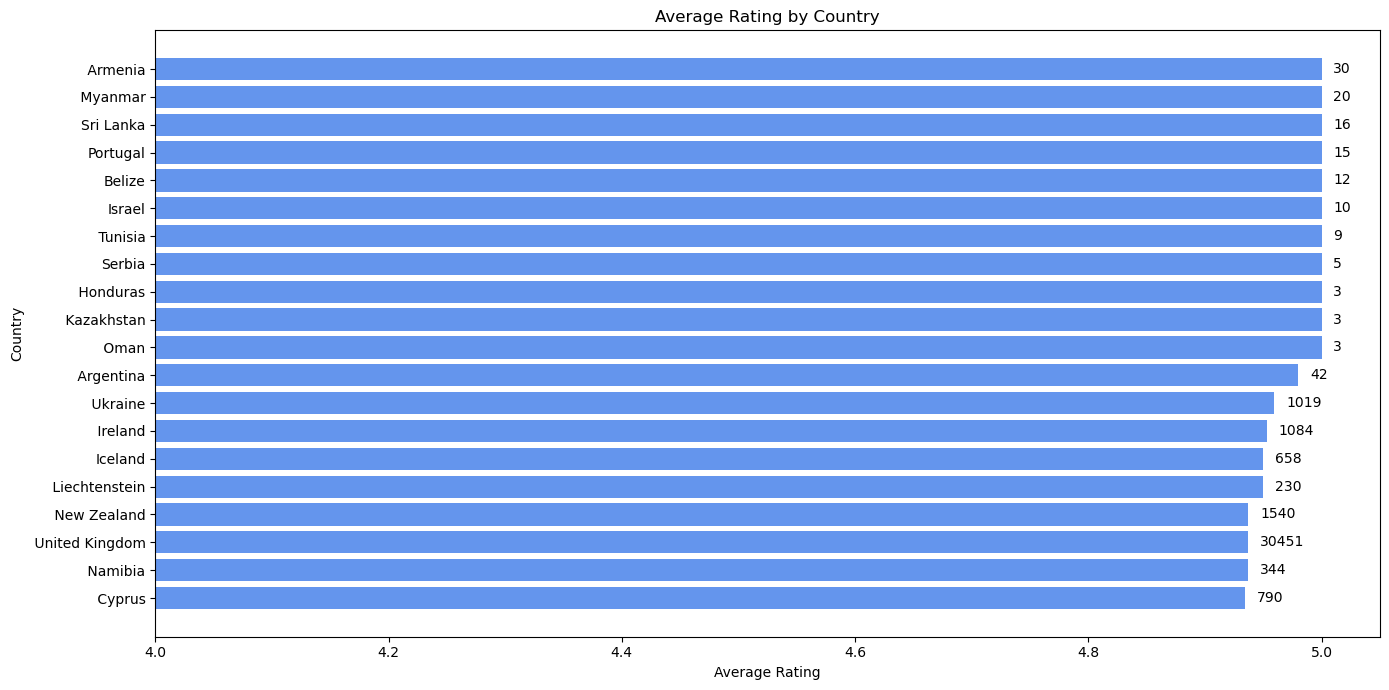

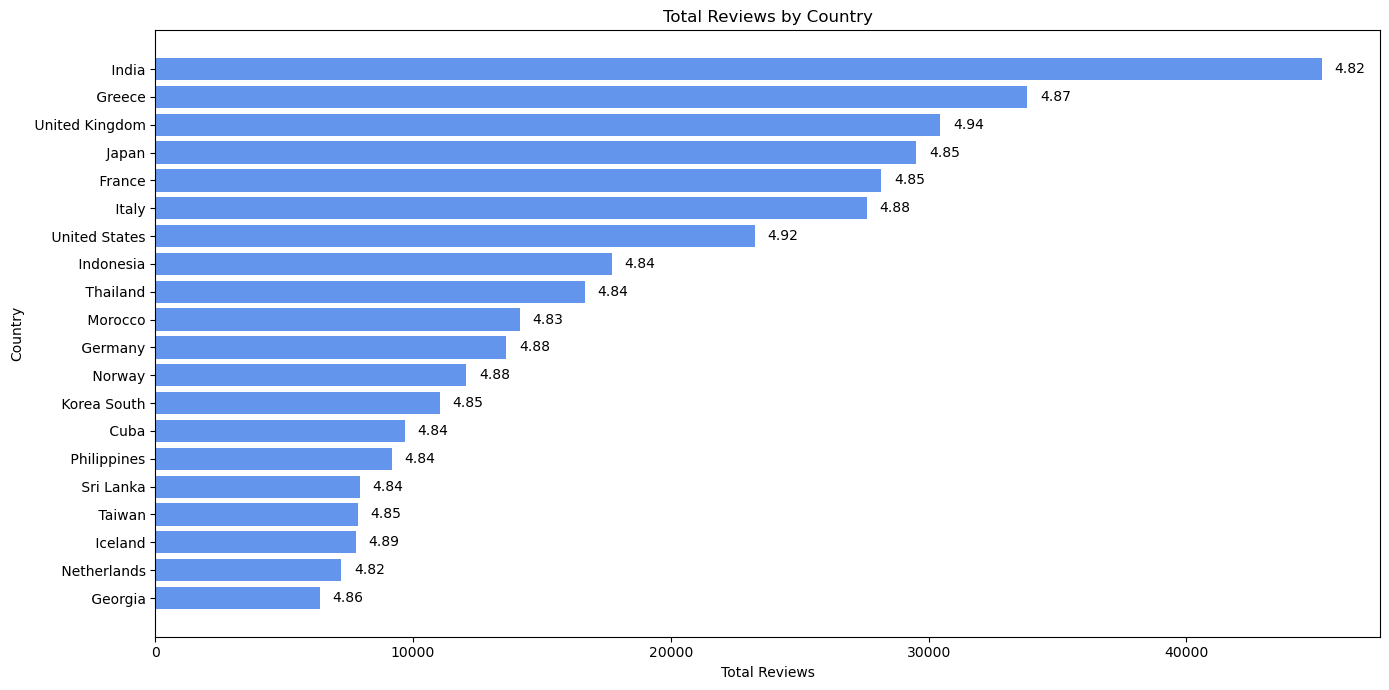

In [55]:
# Data preparation
top20_ratings = country_summary.sort_values(by='rating', ascending=False).head(20)
top20_reviews = country_summary.sort_values(by='reviews', ascending=False).head(20)

# Plot for Average Rating by Country with Number of Reviews Annotation
plt.figure(figsize=(14, 7))
bars = plt.barh(top20_ratings['country'], top20_ratings['rating'], color='cornflowerblue')
plt.title('Average Rating by Country')
plt.xlabel('Average Rating')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest rating at the top

plt.xlim(4, 5.05)

# Annotating each bar with the number of reviews
for bar, reviews in zip(bars, top20_ratings['reviews']):
    plt.text(
        bar.get_width() + .01,  # Adjust position relative to bar width
        bar.get_y() + bar.get_height() / 2, 
        f'{reviews}', 
        va='center', 
        ha='left'
    )

plt.tight_layout()
plt.show()

# Plot for Total Reviews by Country with Average Ratings Annotation
plt.figure(figsize=(14, 7))
bars = plt.barh(top20_reviews['country'], top20_reviews['reviews'], color='cornflowerblue')
plt.title('Total Reviews by Country')
plt.xlabel('Total Reviews')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most reviews at the top

# Annotating each bar with the average rating
for bar, rating in zip(bars, top20_reviews['rating']):
    plt.text(
        bar.get_width() + 500,  # Adjust position relative to bar width
        bar.get_y() + bar.get_height() / 2, 
        f'{rating:.2f}', 
        va='center', 
        ha='left'
    )

plt.tight_layout()
plt.show()


The highest rated countries do not as many ratings as other, which explains why they have 5 out of 5 ratings. This shows people's tendancy to give out 5 stars on aribnb, and only if there is something significantly bad about the data, they will give them a bad rating.

India has the most amount of reviews with an average rating of 4.92. This is probably due to India being the most populated country in the world.


Where is the cheapest airbnb?

In [72]:
# Group by country and find the minimum price for each country
country_mean_prices = df.groupby('country')['usd_price'].mean()
# Sort the mean prices in ascending order
country_mean_prices = country_mean_prices.sort_values()
country_mean_prices
# df[df['country']==' Lebanon']

country
 Lebanon           0.15
 Madagascar        0.22
 Uzbekistan        0.28
 Vietnam           0.45
 Indonesia         1.14
                 ...   
Belize         55301.50
 Belize        55787.58
 Malta         56086.45
 Kuwait       111928.10
 Bahamas      116397.50
Name: usd_price, Length: 146, dtype: float64

In [67]:
# Find the country with the cheapest minimum price
cheapest_country = country_min_prices.idxmin()
cheapest_price = country_min_prices.min()

print(f"The country with the cheapest Airbnb is {cheapest_country} with a price of {cheapest_price}.")

The country with the cheapest Airbnb is  Lebanon with a price of 0.11936219739292363.


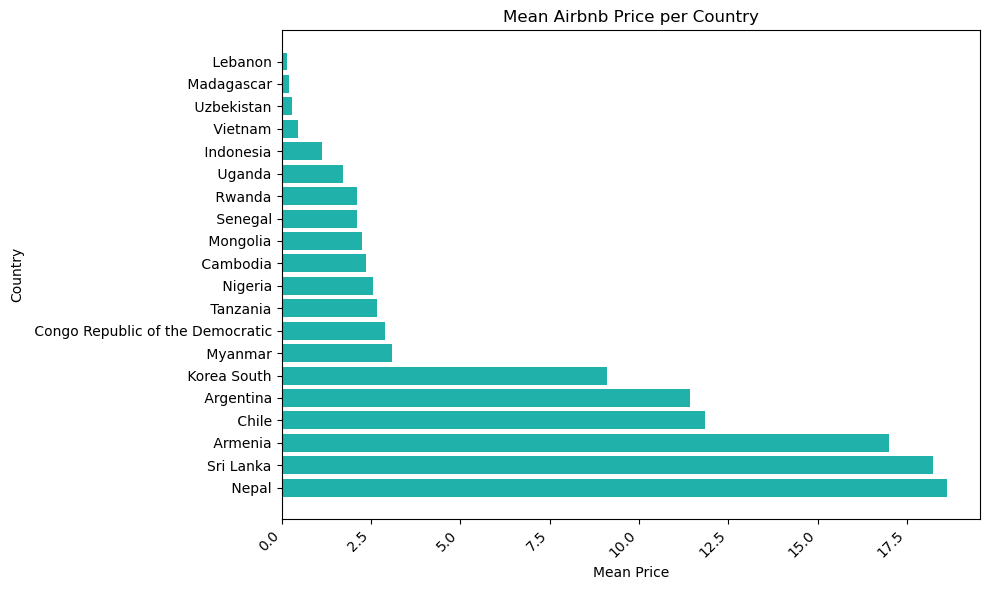

In [77]:
plt.figure(figsize=(10, 6))
top_20_prices = country_mean_prices.head(20)
bars = plt.barh(top_20_prices.index, top_20_prices.values, color='lightseagreen')
plt.ylabel('Country')
plt.xlabel('Mean Price')
plt.title('Mean Airbnb Price per Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().invert_yaxis()  # Invert the y-axis to have the most reviews at the top


plt.tight_layout()
plt.show()

Doesn't seem very promising that the prices are correct...